<a href="https://colab.research.google.com/github/shila121/projects/blob/main/creditRisk_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv("df.csv")
df.head()

,id,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648,-2120,0,2,10
1,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573,-1827,0,3,9
2,100032,0,1,112500.0,327024.0,23827.5,270000.0,0.019101,-15948,-1234,-5782,-3153,0,2,10
3,100044,0,0,121500.0,454500.0,15151.5,454500.0,0.030755,-21077,-1288,-5474,-4270,0,2,10
4,100045,0,0,99000.0,247275.0,17338.5,225000.0,0.006207,-23920,365243,-9817,-4969,0,2,11


In [3]:
df.columns

Index(['id', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          20000 non-null  int64  
 1   TARGET                      20000 non-null  int64  
 2   CNT_CHILDREN                20000 non-null  int64  
 3   AMT_INCOME_TOTAL            20000 non-null  float64
 4   AMT_CREDIT                  20000 non-null  float64
 5   AMT_ANNUITY                 20000 non-null  float64
 6   AMT_GOODS_PRICE             19986 non-null  float64
 7   REGION_POPULATION_RELATIVE  20000 non-null  float64
 8   DAYS_BIRTH                  20000 non-null  int64  
 9   DAYS_EMPLOYED               20000 non-null  int64  
 10  DAYS_REGISTRATION           20000 non-null  int64  
 11  DAYS_ID_PUBLISH             20000 non-null  int64  
 12  FLAG_WORK_PHONE             20000 non-null  int64  
 13  REGION_RATING_CLIENT        200

In [5]:
df.describe()

,id,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
count,20000.000000,20000.00000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,1.998600e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,132438.434700,0.17895,0.433550,1.735475e+05,5.945596e+05,27050.755725,5.325604e+05,0.020588,-15877.603300,59562.859600,-4934.438900,-2974.468200,0.202100,2.069750,12.012650
std,15569.601245,0.38332,0.737843,8.319024e+05,3.976243e+05,14530.344084,3.649684e+05,0.013573,4344.318087,137575.974767,3501.209694,1511.557584,0.401576,0.509115,3.267832
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25166.000000,-17531.000000,-21249.000000,-6226.000000,0.000000,1.000000,0.000000
25%,119591.750000,0.00000,0.000000,1.125000e+05,2.700000e+05,16654.500000,2.385000e+05,0.010006,-19422.250000,-2744.000000,-7418.500000,-4285.000000,0.000000,2.000000,10.000000
50%,138676.500000,0.00000,0.000000,1.440000e+05,5.122418e+05,24930.000000,4.500000e+05,0.018850,-15534.000000,-1200.500000,-4458.000000,-3215.500000,0.000000,2.000000,12.000000
75%,145617.250000,0.00000,1.000000,2.025000e+05,8.086500e+05,34404.750000,6.795000e+05,0.028663,-12249.750000,-322.000000,-1954.000000,-1690.750000,0.000000,2.000000,14.000000
max,151428.000000,1.00000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7683.000000,365243.000000,0.000000,0.000000,1.000000,3.000000,23.000000


In [7]:
df['TARGET'].value_counts()

0    16421
1     3579
Name: TARGET, dtype: int64

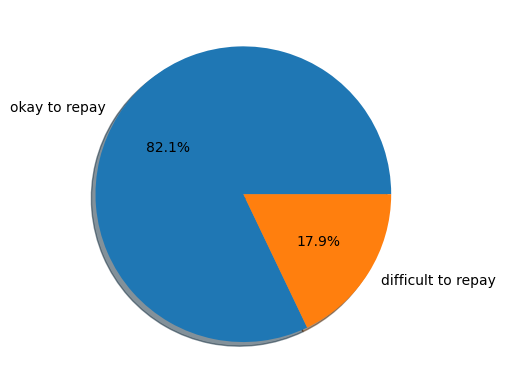

In [8]:
plt.pie(df['TARGET'].value_counts(), labels=['okay to repay', 'difficult to repay'], shadow=True, autopct='%1.1f%%')
plt.axis('off')
plt.show()

In [9]:
df['CNT_CHILDREN'].value_counts()

0     13795
1      4118
2      1781
3       263
4        29
5         8
6         3
8         1
9         1
11        1
Name: CNT_CHILDREN, dtype: int64

In [10]:
child_count = df['CNT_CHILDREN'].value_counts()
for child, count in child_count.items():
    print(f"Number of individuals that have {child} children is: {count}")

Number of individuals that have 0 children is: 13795
Number of individuals that have 1 children is: 4118
Number of individuals that have 2 children is: 1781
Number of individuals that have 3 children is: 263
Number of individuals that have 4 children is: 29
Number of individuals that have 5 children is: 8
Number of individuals that have 6 children is: 3
Number of individuals that have 8 children is: 1
Number of individuals that have 9 children is: 1
Number of individuals that have 11 children is: 1


In [11]:
# Outlier Detection using Interquartile Range (IQR)?


df[["AMT_INCOME_TOTAL"]].describe().applymap(lambda x: f"{x:,.3f}")

,AMT_INCOME_TOTAL
count,"20,000.000"
mean,"173,547.463"
std,"831,902.381"
min,"25,650.000"
25%,"112,500.000"
50%,"144,000.000"
75%,"202,500.000"
max,"117,000,000.000"


In [12]:
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['AMT_INCOME_TOTAL'] < lower_bound) | (df['AMT_INCOME_TOTAL'] > upper_bound)]

print("Outlier Detection Bounds:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
df = df.drop(outliers.index)
df.describe()

Outlier Detection Bounds:
Lower bound: -22500.0
Upper bound: 337500.0


,id,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
count,19113.000000,19113.000000,19113.000000,19113.000000,1.911300e+04,19113.000000,1.910000e+04,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000
mean,132443.026788,0.180348,0.431434,153823.644432,5.765888e+05,26252.145817,5.154887e+05,0.020184,-15887.445247,61309.828912,-4961.227803,-2975.074347,0.201852,2.083346,11.978810
std,15571.370327,0.384487,0.735982,64089.269876,3.804076e+05,13383.513788,3.474506e+05,0.012970,4378.959452,139092.622959,3507.266884,1510.921862,0.401393,0.499069,3.262019
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25166.000000,-17531.000000,-21249.000000,-6226.000000,0.000000,1.000000,1.000000
25%,119599.000000,0.000000,0.000000,112500.000000,2.700000e+05,16434.000000,2.295000e+05,0.010006,-19489.000000,-2702.000000,-7457.000000,-4287.000000,0.000000,2.000000,10.000000
50%,138676.000000,0.000000,0.000000,135000.000000,4.992615e+05,24457.500000,4.500000e+05,0.018850,-15538.000000,-1175.000000,-4482.000000,-3213.000000,0.000000,2.000000,12.000000
75%,145620.000000,0.000000,1.000000,198000.000000,7.852500e+05,33025.500000,6.750000e+05,0.026392,-12218.000000,-299.000000,-1978.000000,-1690.000000,0.000000,2.000000,14.000000
max,151428.000000,1.000000,11.000000,337500.000000,2.961000e+06,173574.000000,2.961000e+06,0.072508,-7683.000000,365243.000000,0.000000,0.000000,1.000000,3.000000,23.000000


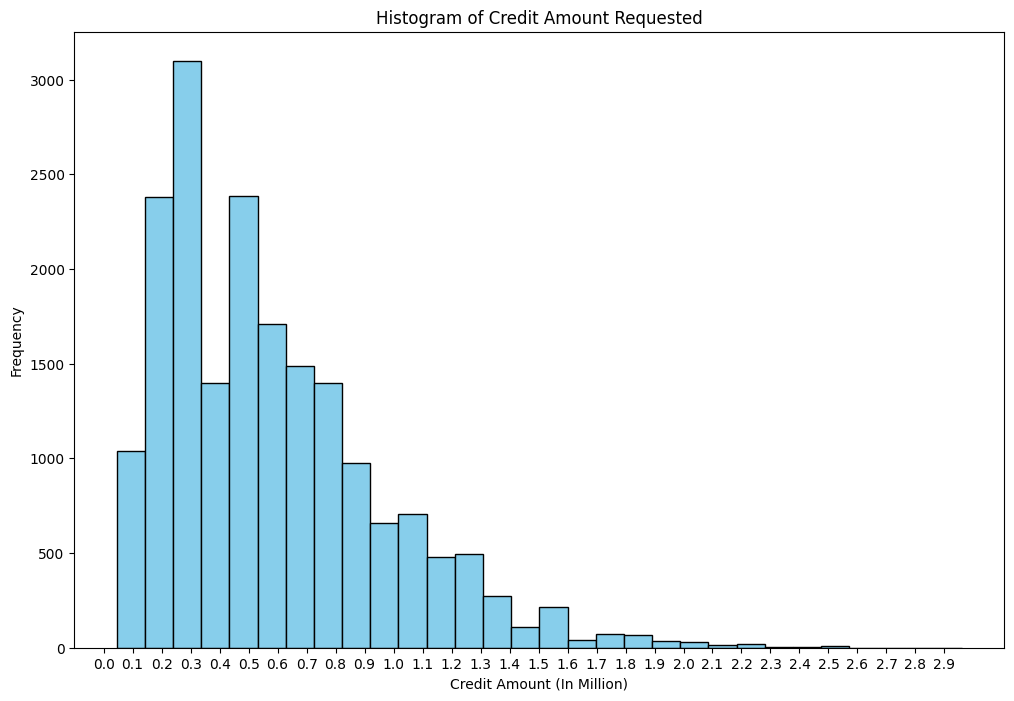

In [13]:
plt.figure(figsize=(12,8))
plt.hist(df['AMT_CREDIT'] / 1000000, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Credit Amount Requested')
plt.xlabel('Credit Amount (In Million)')
plt.ylabel('Frequency')
tick_values = [i / 10 for i in range(int(10 * min(df['AMT_CREDIT'] / 1000000)), int(10 * max(df['AMT_CREDIT'] / 1000000)) + 1)]
plt.xticks(tick_values)
plt.show()

In [14]:
df = df.dropna()
df.shape

(19100, 15)

In [15]:
X = df.drop(columns=['TARGET', 'id'])
y = df['TARGET']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Logistic Regression?


lr_model = LogisticRegression()

lr_model.fit(X_train_scaled, y_train)

accuracy = lr_model.score(X_test_scaled, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8235602094240838


In [19]:
# Random Forest



rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)

accuracy = rf_model.score(X_test_scaled, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8230366492146597


In [20]:
# Support Vector Machine


svm_model = SVC()

svm_model.fit(X_train_scaled, y_train)

accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8240837696335078


In [21]:
# Neural Network


# Build a simple neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Epoch 1/50
478/478 [==============================] - 4s 5ms/step - loss: 0.5084 - accuracy: 0.8030 - val_loss: 0.4608 - val_accuracy: 0.8241
Epoch 2/50
478/478 [==============================] - 2s 4ms/step - loss: 0.4823 - accuracy: 0.8185 - val_loss: 0.4595 - val_accuracy: 0.8241
Epoch 3/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4770 - accuracy: 0.8185 - val_loss: 0.4572 - val_accuracy: 0.8241
Epoch 4/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4729 - accuracy: 0.8185 - val_loss: 0.4576 - val_accuracy: 0.8241
Epoch 5/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.8185 - val_loss: 0.4559 - val_accuracy: 0.8241
Epoch 6/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4677 - accuracy: 0.8185 - val_loss: 0.4550 - val_accuracy: 0.8241
Epoch 7/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.8185 - val_loss: 0.4568 - val_accuracy: 0.8241
Epoch 

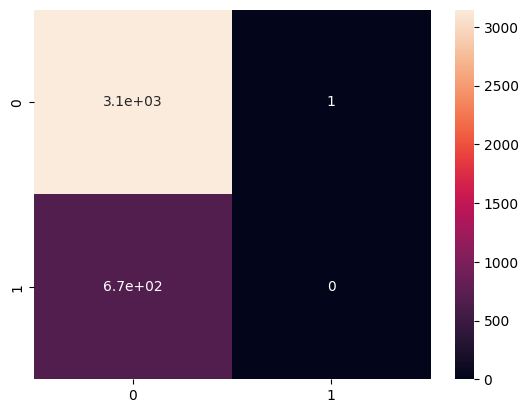

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.show()